In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Audio processing
import librosa
import librosa.display

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
import zipfile
import os

# Create folder for extraction
os.makedirs("/content/TESS", exist_ok=True)

# Unzip correct file
with zipfile.ZipFile("/content/TESS_Toronto.zip", 'r') as z:
    z.extractall("/content/TESS")

print("TESS unzipped!")
os.listdir("/content/TESS")[:10]


TESS unzipped!


['TESS Toronto emotional speech set data',
 'tess toronto emotional speech set data']

In [ ]:
os.makedirs("/content/VOICE", exist_ok=True)

with zipfile.ZipFile("/content/voice.zip", 'r') as z:
    z.extractall("/content/VOICE")

print("VOICE unzipped!")
os.listdir("/content/VOICE")[:10]


VOICE unzipped!


['Actor_07',
 'Actor_05',
 'Actor_12',
 'Actor_09',
 'Actor_17',
 'Actor_01',
 'Actor_22',
 'Actor_18',
 'Actor_08',
 'Actor_02']

In [ ]:
pcos_df = pd.read_csv("/content/PCOS_data.csv")
endo_df = pd.read_csv("/content/structured_endometriosis_data.csv")


In [ ]:
pcos_df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [ ]:
endo_df.head()

,Age,Menstrual_Irregularity,Chronic_Pain_Level,Hormone_Level_Abnormality,Infertility,BMI,Diagnosis
0,24,1,8.361531,0,0,19.451314,0
1,37,1,4.995508,0,0,22.388436,0
2,46,1,3.363996,1,0,21.320443,0
3,32,1,5.246037,0,0,20.177715,1
4,28,1,3.898932,1,0,23.538103,1


In [ ]:
print("PCOS Data Shape:", pcos_df.shape)
print("Endometriosis Data Shape:", endo_df.shape)

PCOS Data Shape: (541, 44)
Endometriosis Data Shape: (10000, 7)


In [ ]:
pcos_df.isnull().sum()

,0
Sl. No,0
Patient File No.,0
PCOS (Y/N),0
Age (yrs),0
Weight (Kg),0
Height(Cm),0
BMI,0
Blood Group,0
Pulse rate(bpm),0
RR (breaths/min),0


In [ ]:
# Clean PCOS dataset

pcos_df = pcos_df.dropna()
pcos_df = pcos_df.select_dtypes(include=['int64','float64'])

print("PCOS Data Shape:",pcos_df.shape)
pcos_df.head()


PCOS Data Shape: (539, 42)


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [ ]:
# Clean Endometriosis dataset

endo_df = endo_df.dropna()
endo_df = endo_df.select_dtypes(include=['int64','float64'])

print("Endometriosis Data Shape:", endo_df.shape)
endo_df.head()


Endometriosis Data Shape: (10000, 7)


,Age,Menstrual_Irregularity,Chronic_Pain_Level,Hormone_Level_Abnormality,Infertility,BMI,Diagnosis
0,24,1,8.361531,0,0,19.451314,0
1,37,1,4.995508,0,0,22.388436,0
2,46,1,3.363996,1,0,21.320443,0
3,32,1,5.246037,0,0,20.177715,1
4,28,1,3.898932,1,0,23.538103,1


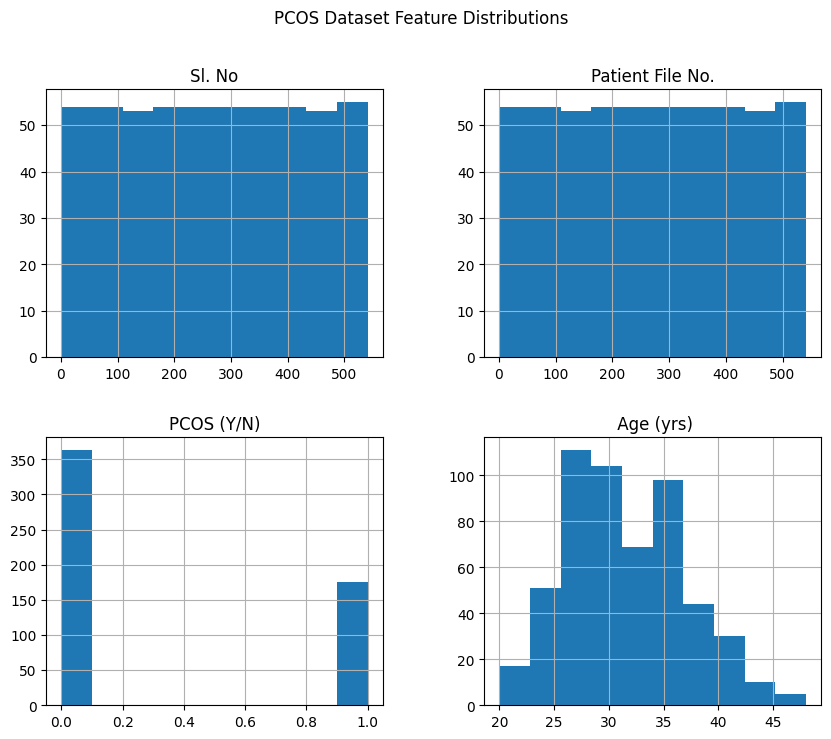

In [ ]:
important_cols = pcos_df.columns[:4]

pcos_df[important_cols].hist(figsize=(10,8))
plt.suptitle("PCOS Dataset Feature Distributions")
plt.show()


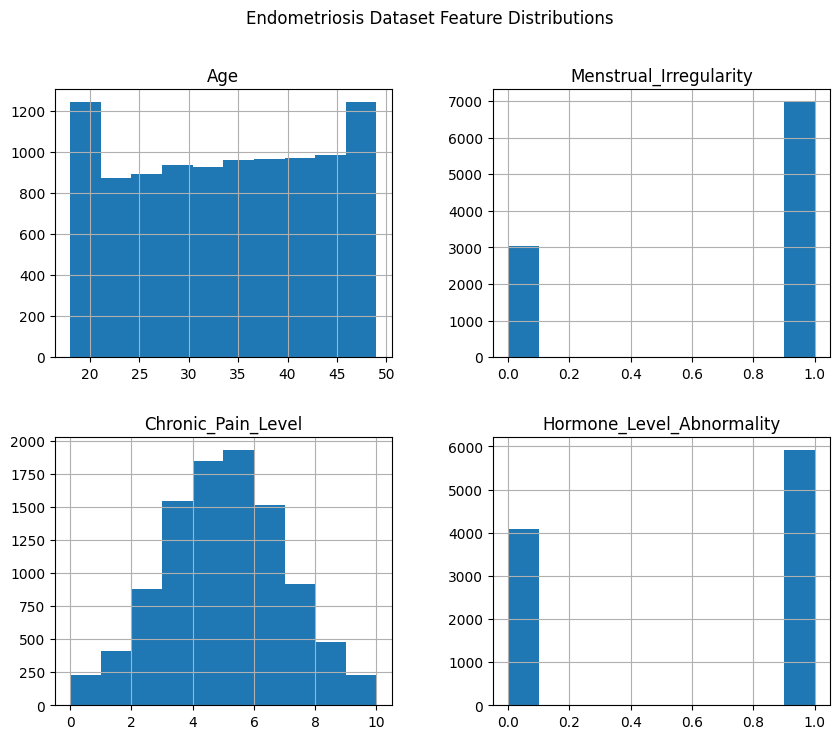

In [ ]:
important_cols2 = endo_df.columns[:4]

endo_df[important_cols2].hist(figsize=(10,8))
plt.suptitle("Endometriosis Dataset Feature Distributions")
plt.show()


Binary Target in PCOS: PCOS (Y/N)


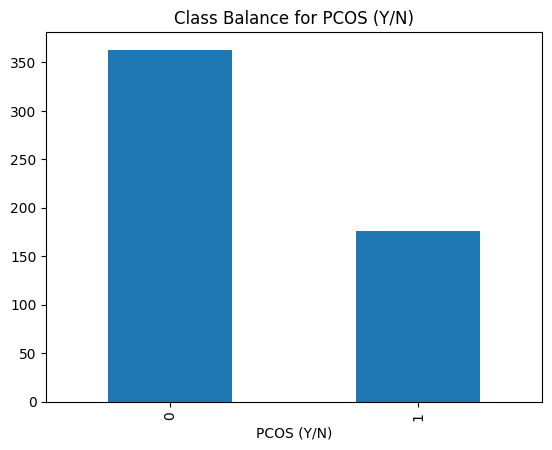

In [ ]:
for col in pcos_df.columns:
    if pcos_df[col].nunique() == 2:
        print("Binary Target in PCOS:", col)
        pcos_df[col].value_counts().plot(kind='bar')
        plt.title(f"Class Balance for {col}")
        plt.show()
        break


Binary Target in Endometriosis: Menstrual_Irregularity


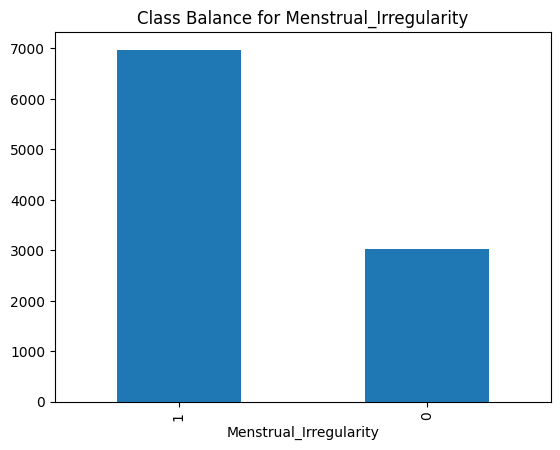

In [ ]:
for col in endo_df.columns:
    if endo_df[col].nunique() == 2:
        print("Binary Target in Endometriosis:", col)
        endo_df[col].value_counts().plot(kind='bar')
        plt.title(f"Class Balance for {col}")
        plt.show()
        break


In [ ]:
import librosa

audio_features = []

# Folder where your audio is extracted
audio_path = "/content/TESS/"

for root, dirs, files in os.walk(audio_path):
    for file in files:
        if file.endswith(".wav"):
            filepath = os.path.join(root, file)

            try:
                y, sr = librosa.load(filepath, sr=None)

                # Feature Extraction
                mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr), axis=1)
                zcr = np.mean(librosa.feature.zero_crossing_rate(y))
                centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
                chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))

                audio_features.append([
                    file,
                    zcr,
                    centroid,
                    chroma
                ] + mfcc.tolist())

            except:
                pass

# Create DataFrame
columns = ["filename", "zcr", "centroid", "chroma"] + [f"mfcc_{i}" for i in range(20)]
audio_df = pd.DataFrame(audio_features, columns=columns)

audio_df.head()


,filename,zcr,centroid,chroma,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,...,mfcc_10,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19
0,YAF_ton_disgust.wav,0.158488,2994.383890,0.380576,-406.031250,78.340233,-1.047834,18.125092,-3.609342,-1.495695,...,-9.847399,-1.045702,-7.105367,-1.973592,1.826567,-9.559196,-0.701267,-2.647269,-6.214993,-0.347657
1,YAF_five_disgust.wav,0.218158,3452.210734,0.382710,-404.779022,71.764214,-3.796132,7.705873,-9.677696,-3.986384,...,-7.298221,0.672837,-4.453538,-6.293837,0.122549,-5.429994,-1.739804,-0.563112,-4.158321,-3.752652
2,YAF_voice_disgust.wav,0.241887,3881.980418,0.318368,-423.025909,57.017479,15.258147,15.548654,-4.754617,-8.333101,...,-7.276845,2.892756,-3.365415,-0.151505,1.191054,-6.502606,0.859903,-0.884467,-4.799915,-0.768140
3,YAF_hit_disgust.wav,0.182328,3271.336793,0.378906,-388.023071,60.890255,-11.273656,27.923874,-4.015624,-12.874119,...,-10.027391,2.276452,0.838821,-3.815835,1.322179,-7.587025,-0.738834,-0.223197,-11.177795,1.113989
4,YAF_wash_disgust.wav,0.181058,3032.736012,0.316592,-429.162964,69.006386,-4.246232,18.857275,-16.671978,-5.333232,...,-6.671731,-1.147223,-3.035784,-0.769457,0.586761,-4.893136,0.046613,-2.229124,-2.379291,1.149276


In [ ]:
import numpy as np

def emotion_intensity(row):
    mfcc_values = row[[f"mfcc_{i}" for i in range(20)]].values
    return np.std(mfcc_values)

audio_df["intensity"] = audio_df.apply(emotion_intensity, axis=1)

def estimate_gender(row):
    mfcc_values = row[[f"mfcc_{i}" for i in range(20)]].values
    pitch = np.mean(mfcc_values[:5])        # using MFCC-0..4 as pitch approximation
    return "male" if pitch < 50 else "female"

audio_df["gender_est"] = audio_df.apply(estimate_gender, axis=1)

def estimate_age(row):
    mfcc_values = row[[f"mfcc_{i}" for i in range(20)]].values
    var = np.std(mfcc_values)
    if var > 30:
        return "young"
    return "adult"

audio_df["age_est"] = audio_df.apply(estimate_age, axis=1)


In [ ]:
def extract_emotion(filename):
    return filename.split('_')[1]

audio_df["emotion"] = audio_df["filename"].apply(extract_emotion)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le_emotion = LabelEncoder()
le_gender = LabelEncoder()
le_age = LabelEncoder()

audio_df["emotion_enc"] = le_emotion.fit_transform(audio_df["emotion"])
audio_df["gender_enc"] = le_gender.fit_transform(audio_df["gender_est"])
audio_df["age_enc"] = le_age.fit_transform(audio_df["age_est"])


In [ ]:
feature_cols = (
    ["zcr", "centroid", "chroma", "intensity", "gender_enc", "age_enc"]
    + [f"mfcc_{i}" for i in range(20)]
)

X = audio_df[feature_cols]
y = audio_df["emotion_enc"]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8535714285714285

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       1.00      0.67      0.80         6
           4       0.75      1.00      0.86         6
           5       1.00      0.60      0.75         5
           6       1.00      0.67      0.80         6
           7       0.75      1.00      0.86         6
           8       1.00      0.67      0.80         6
           9       1.00      0.60      0.75         5
          10       1.00      0.33      0.50         6
          11       1.00      1.00      1.00         6
          12       0.33      0.60      0.43         5
          13       1.00      1.00      1.00         6
          14       0.67      0.67      0.67         6
          15       1.00      1.00      1.00         5
          16       1.00     